#Polynomial Linear Regression Genel Förmülü:
y=a+b1x+b2x^2+b3x^3+b4x^4...+bnx^n

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


#Veri setimizi pandas yardimiyla alip dataframe nesnemiz olan
# df'in icine aktariyoruz....
df=pd.read_csv('/content/polynomial.csv',sep=';')





 

In [2]:
df

,deneyim,maas
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000
5,6,15000
6,7,20000
7,8,30000
8,9,50000
9,10,100000


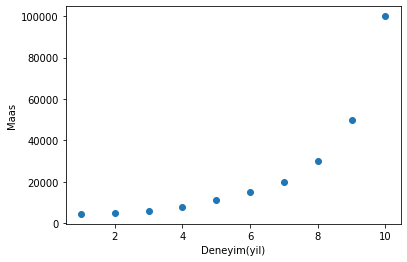

In [3]:
#Veri setimize bir bakalim
plt.scatter(df['deneyim'],df['maas'])
plt.xlabel('Deneyim(yil)')
plt.ylabel('Maas')
plt.savefig('1.png',dpi=300)
plt.show()

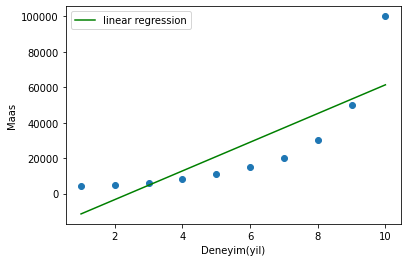

In [4]:
#Görüldügü gibi dogrusal bir yapida dagilmiyor veriler
#Eger biz bu veri setine linear regression uygularsak hic uygun olmayan bir tahmin cizgisi görürüz

reg=LinearRegression()
reg.fit(df[['deneyim']],df['maas'])

plt.xlabel('Deneyim(yil)')
plt.ylabel('Maas')

plt.scatter(df['deneyim'],df['maas'])

x_ekseni=df['deneyim']
y_ekseni=reg.predict(df[['deneyim']])
plt.plot(x_ekseni,y_ekseni,color='green',label='linear regression')
plt.legend()
plt.show()

Tahmin cok kötü oldugu icin bu veri seti icin linear regression uygulamak dogru degildir. Unutulmamali ki
veri setine göre model secilmeli. Öncelikle veri setini cok iyi hakim olunmali ve bilinmeli!!!

#Bu Veri seti icin regression cesitlerinden polynomial regression uygulanmasi gerektgine karar verdik.
#Simdi bunun nasil uygulandigina bakalim:
x degerimizi polinom yukaridaki fonksiyonuna uyacak sekilde uyarlanmasini sagliyoruz.
Yani=>1,x,x^2(n=2)seklinde

In [5]:
#bir adet polynomial regression nesnesi olsuturmasi icin PolnomialFeatures fonskyion 
#cagiriyoru.
#Bu fonksyionu cagirirken polinomun derecesini(n) belirtiyoruz

polynomial_regression=PolynomialFeatures(degree=6)

#burada degree yani N'i degistirip dogru sekilde veriye uygun cizim yapilmis mi diye kontrol edilmeli
#ancak böyle data setine uygun olup olmadigini görebiliriz.N=2 de kötü N=6 da cok iyi sonuc verdi

x_polynomial=polynomial_regression.fit_transform(df[['deneyim']])

In [6]:
#regression model nesnemizi olan reg nesnemizi olusturup bunun fit metodunu cagirarak
#x_polynomial ve y eksenlerini fit ediyoruz
#yani regresyon modelimizi mevcut gercek verilerle egitiyoruz

reg=LinearRegression()
reg.fit(x_polynomial,df['maas'])

LinearRegression()

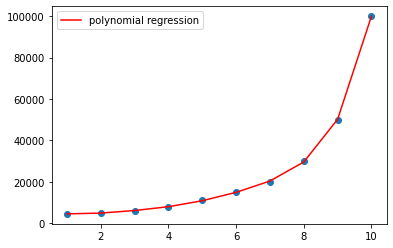

In [7]:
#Artik modelimiz hazir ve egitilmis, simdi eldeki verilere göre modelimiz nasil bir 
#sonuc grafigi olusturuyor onu görelim:

y_head=reg.predict(x_polynomial)
plt.plot(df['deneyim'],y_head,color='red',label='polynomial regression')
plt.legend()

#veri setimizi de noktalar olarak catter edelim de görelim bakalim uymus mu polynomial regression
plt.scatter(df['deneyim'],df['maas'])
plt.show()

In [8]:
#Deneyimi 4.5 yil olan biri icin ne kadar maas vermeliyiz bilmiyoruz. bunu hemen hesaplatalim :)
x_polynomial1=polynomial_regression.fit_transform([[4.5]])
reg.predict(x_polynomial1)
#predict()egitilmis modele göre yeni verilen verinin tahmin sonucunu getirir.

array([9288.12662784])